<a href="https://colab.research.google.com/github/gusti011/Coder-DS2-Entrega-Final/blob/main/TP_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis de Perfiles de Tweets de Integrantes Clave del Gobierno Argentino**
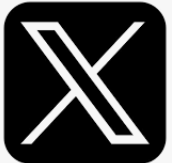

                              Alumno: Gustavo Ignacio FERRERES
                              CoderHouse. Comisión 61115
                              Data Science II: Machine Learning para la Ciencia de Datos

**Motivación:** En la era digital, las redes sociales se han convertido en una herramienta fundamental para la comunicación y la interacción entre figuras públicas y la ciudadanía. En particular, X (Twitter) se destaca como una plataforma donde los líderes políticos pueden compartir sus ideas, interactuar con el público y medir el impacto de sus mensajes en tiempo real. Este estudio se centra en el análisis de los perfiles de Twitter de los integrantes clave del gobierno argentino, con el objetivo de entender mejor cómo sus Posteos,  influyen en la percepción pública y en la dinámica política.

**Audiencia:** Este análisis está dirigido a investigadores de ciencias sociales, analistas políticos, profesionales de la comunicación y cualquier persona interesada en la intersección entre política y redes sociales. Los resultados de este estudio proporcionarán una visión profunda sobre cómo los líderes políticos utilizan X (Twitter) para comunicarse con el público y cómo sus interacciones en la plataforma pueden reflejar y afectar su influencia y popularidad.

**Objetivos:**

Identificar patrones en la frecuencia y el contenido de los tweets de los líderes políticos. ¿Existe un día de la semana que represente un momento más oportuno para hacer una publicación? ¿Se puede predecir la cantidad de Retweets a través de un texto?   

Analizar la relación entre el contenido de los tweets y el número de interacciones (comentarios, likes y retweets).

Evaluar el impacto de los tweets en la percepción pública a través del análisis de sentimiento.




**Resumen de Metadata**

**Data Acquisition:** El presente trabajo significó un verdadero desafío en cuanto a la obtención de datos. Se comenzó trabajando con API (primera entrega de la cursada), pero atento a las limitaciones que impone la red social X, se decidió utilizar técnicas de Web Scraping para armar luego los datasets a estudiar.

Se analizaron los perfiles de la red social X de figuras destacadas del gobierno argentino, seleccionando los cuatro con mayor interacción.

**Dataset Perfiles:**

Nombre: Nombre del titular de la cuenta.

Cuenta: Designación de la cuenta precedida por el identificador @.

Descripción: Profesión, actividad o información relevante del titular de la cuenta.

Fecha de Creación: Día en que se unió a la red social X.

Posteos: Número total de publicaciones.

Following: Cantidad de cuentas que sigue.

Followers: Número de usuarios que siguen la cuenta.

**Dataset (JMilei, Adorni, Bullrich, Villarruel):**

Nombre: Nombre del titular de la cuenta.

Cuenta: Designación de la cuenta precedida por el identificador @.

Fecha: Día y hora de la publicación.

Tweet: Texto del tweet.

Multimedia: Información sobre archivos adjuntos en la publicación.

Vistas: Número de usuarios que vieron el posteo.

Comentarios: Número de usuarios que comentaron sobre el posteo.

Retweets: Número de usuarios que replicaron el posteo en sus cuentas.

Likes: Número de personas que indicaron que les gusta lo publicado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS #(Nube de Palabras)
import nltk
nltk.download('punkt')
nltk.download('stopwords') # Descargamos stopwords corpus #Palabras vacías
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Análisis de Perfiles**
Analizamos los perfiles de las personas mas representativas del gobierno para filtrar las cuatro cuentas mas representativas.-

In [ ]:
df = pd.read_excel('Perfil_X.xlsx')
df.head(10)

,Nombre,Cuenta,Descripción,Fecha de Creación,Posteos,Following,Followers
0,Patricia Bullrich,@PatoBullrich,Ministra de Seguridad de la Nación. Doctora en...,July 2009,32.9K,2380,1.8M
1,Santiago Caputo,@SantiCaputoOK_,Asesor.\n\nLIBERTAS PECUNIA LUI NON POTEST.,November 2020,24.2K,2161,27.5K
2,totocaputo,@LuisCaputoAR,Ministro de Economía de la República Argentina...,November 2018,1.183K,258,221.1K
3,Manuel Adorni,@madorni,Vocero Presidencial. Responsable de la comunic...,June 2009,25.5K,290,777.6K
4,Javier Milei,@JMileiElecto,"Long live freedom, damn it! . \nMirror AI",April 2017,27K,2112,62.2K
5,Victoria Villarruel,@VickyVillarruel,Argentina. Vicepresidente de la Nación. Presid...,April 2009,78.5K,1220,720.7K
6,Javier Milei,@JMilei,Economista,October 2015,264.9K,1214,3.4M
7,Karina Milei,@KarinaMileiOk,Secretaría General de la Presidencia de la Nación,April 2024,22,94,105.3K
8,Martin Menem,@MenemMartin,Presidente de La Honorable Cámara de Diputados...,July 2010,14.2K,681,100.2K


In [ ]:
df.info() #Analizamos la información.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              9 non-null      object
 1   Cuenta              9 non-null      object
 2   Descripción         9 non-null      object
 3   Fecha de Creación   9 non-null      object
 4   Posteos             9 non-null      object
 5   Following           9 non-null      int64 
 6   Followers           9 non-null      object
dtypes: int64(1), object(6)
memory usage: 632.0+ bytes


Observación: Los atributos Posteos,y Followers son del tipo Object debiendo ser int (número entero)

In [ ]:
# Función para convertir strings con K y M a números enteros
def convert_to_int(value):
  if isinstance(value, str):
    if 'K' in value:
      return int(float(value.replace('K', '')) * 1000)
    elif 'M' in value:
      return int(float(value.replace('M', '')) * 1000000)
    else:
      return int(value)
  return value

# Aplicar la función a las columnas 'Posteos' y 'Followers'
df['Posteos'] = df['Posteos'].apply(convert_to_int)
df['Followers'] = df['Followers'].apply(convert_to_int)

df.head() #Controlamos si los cambios se aplicaron correctamente

,Nombre,Cuenta,Descripción,Fecha de Creación,Posteos,Following,Followers
0,Patricia Bullrich,@PatoBullrich,Ministra de Seguridad de la Nación. Doctora en...,July 2009,32900,2380,1800000
1,Santiago Caputo,@SantiCaputoOK_,Asesor.\n\nLIBERTAS PECUNIA LUI NON POTEST.,November 2020,24200,2161,27500
2,totocaputo,@LuisCaputoAR,Ministro de Economía de la República Argentina...,November 2018,1183,258,221100
3,Manuel Adorni,@madorni,Vocero Presidencial. Responsable de la comunic...,June 2009,25500,290,777600
4,Javier Milei,@JMileiElecto,"Long live freedom, damn it! . \nMirror AI",April 2017,27000,2112,62200


In [ ]:
df.info() #controlamos si el tipo de atributo es número entero en las columnas modificadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              9 non-null      object
 1   Cuenta              9 non-null      object
 2   Descripción         9 non-null      object
 3   Fecha de Creación   9 non-null      object
 4   Posteos             9 non-null      int64 
 5   Following           9 non-null      int64 
 6   Followers           9 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 632.0+ bytes


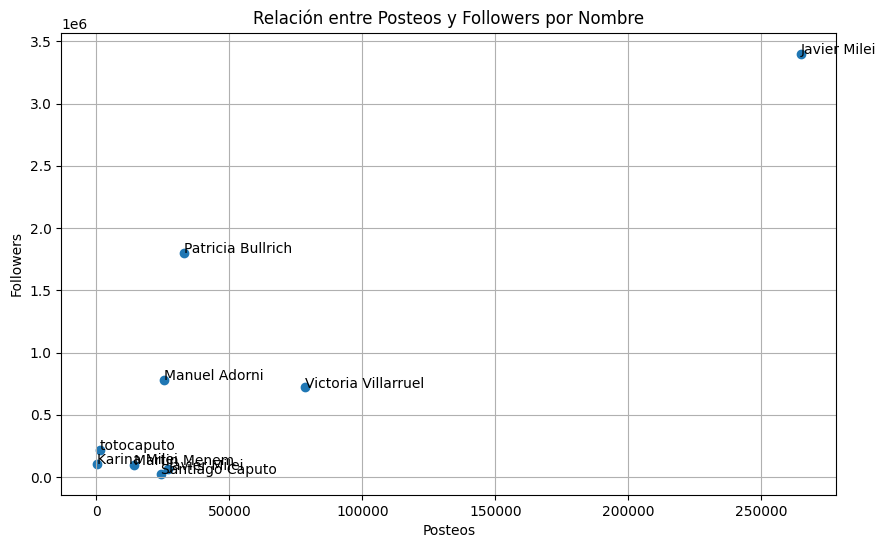

In [ ]:
#GRAFICAMOS los datos de Posteos y Followers por "nombre" para decidir con que cuentas trabajar
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
plt.scatter(df['Posteos'], df['Followers'])
plt.xlabel('Posteos')
plt.ylabel('Followers')
plt.title('Relación entre Posteos y Followers por Nombre')

# Agregar etiquetas de los nombres a los puntos
for i, txt in enumerate(df['Nombre']):
  plt.annotate(txt, (df['Posteos'][i], df['Followers'][i]))

plt.grid(True)
plt.show()

**OBSERVACION:**  Claramente **Javier Milei** como líder del movimiento es quien lidera la cantidad de Posteos y Followers. Hay que destacar JMilei utiliza dos cuentas en paralelo (@JMilei y @JMileiElecto). Para este trabajo pondremos foco en la cuenta de @JMileiElecto ya que contiene comentarios realizados por el usuario, mientras que JMilei es una cuenta mayoritariamente con "reposteos" de terceros.
 Luego nos quedaremos con las cuentas de **Patricia Bullrich** por ser quien sigue en cantidad de seguidores, cerrando con las cuentas de **Victoria Villarruel** y **Manuel Adorni** por ser quienes siguen en cantidad de Followers y posteos


# **ANALISIS DE CUENTAS**

In [ ]:
#Conectamos los datasets seleccionados para su análisis
df_JMilei = pd.read_excel('JMilei.xlsx')
df_adorni = pd.read_excel('Adorni.xlsx')
df_Bullrich = pd.read_excel('Bullrich.xlsx')
df_Villarruel = pd.read_excel('Villarruel.xlsx')


In [ ]:
# Concatenar los DataFrames
df_gobierno = pd.concat([df_adorni, df_JMilei, df_Bullrich, df_Villarruel], ignore_index=True)
df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes
0,Manuel Adorni,@madorni,"1:44 PM · Oct 12, 2024",¡Feliz día de la Raza!\n\nFin.,NaN,700.6K,1.4K,2K,20K
1,Manuel Adorni,@madorni,"6:30 PM · Oct 11, 2024",Nace el “Palacio Libertad”. Fin.,https://x.com/madorni/status/18448530020894476...,1.7M,1.9K,3.6K,24K
2,Manuel Adorni,@madorni,"4:52 PM · Oct 10, 2024",El CCK ha dejado de existir.\n\nFin.,https://x.com/madorni/status/18444659707501078...,872.2K,2.6K,3.8K,21K
3,Manuel Adorni,@madorni,"4:17 PM · Oct 10, 2024","En septiembre de 2024 la inflación fue del 3,5...",NaN,312.1K,534,2K,14K
4,Manuel Adorni,@madorni,"1:45 PM · Oct 10, 2024",Estuviste en otra conferencia evidentemente. ¿...,NaN,146.4K,156,923,8.7K


In [ ]:
df_gobierno.info() #Analizamos la composición del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       1391 non-null   object
 1   Cuenta       1391 non-null   object
 2   Fecha        1391 non-null   object
 3   Tweet        1391 non-null   object
 4   Multimedia   1119 non-null   object
 5   Vistas       1391 non-null   object
 6   Comentarios  1391 non-null   object
 7   Retweets     1391 non-null   object
 8   Likes        1391 non-null   object
dtypes: object(9)
memory usage: 97.9+ KB


###  **REEMPLAZAMOS VALORES NULOS**

Se observan valores nulos en la columna **Multimedia**, toda vez que no todos los tweets tienen contenido multimedia

In [ ]:
# Reemplazar valores nulos en el DataFrame df_gobierno con 0
df_gobierno.fillna(0, inplace=True)

print(df_gobierno.isnull().sum()) # verificar si hay valores nulos después de la limpieza

Nombre         0
Cuenta         0
Fecha          0
Tweet          0
Multimedia     0
Vistas         0
Comentarios    0
Retweets       0
Likes          0
dtype: int64


In [ ]:
df_gobierno.head()# Verificamos como se aplicaron los cambios

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes
0,Manuel Adorni,@madorni,"1:44 PM · Oct 12, 2024",¡Feliz día de la Raza!\n\nFin.,0,700.6K,1.4K,2K,20K
1,Manuel Adorni,@madorni,"6:30 PM · Oct 11, 2024",Nace el “Palacio Libertad”. Fin.,https://x.com/madorni/status/18448530020894476...,1.7M,1.9K,3.6K,24K
2,Manuel Adorni,@madorni,"4:52 PM · Oct 10, 2024",El CCK ha dejado de existir.\n\nFin.,https://x.com/madorni/status/18444659707501078...,872.2K,2.6K,3.8K,21K
3,Manuel Adorni,@madorni,"4:17 PM · Oct 10, 2024","En septiembre de 2024 la inflación fue del 3,5...",0,312.1K,534,2K,14K
4,Manuel Adorni,@madorni,"1:45 PM · Oct 10, 2024",Estuviste en otra conferencia evidentemente. ¿...,0,146.4K,156,923,8.7K


**CONVERSION COLUMNA MULTIMEDIA**

Teniendo en cuenta que le asignamos valor de **0 (nulos)**,  le asignaremos el valor **1** a los registros con contenido **multimedia**

In [ ]:
#asignamos el valor 1 a los registros distintos a 0 y convertimos la columna a enteros (int)

df_gobierno['Multimedia'] = np.where(df_gobierno['Multimedia'] != 0, 1, df_gobierno['Multimedia']).astype(int)
df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes
0,Manuel Adorni,@madorni,"1:44 PM · Oct 12, 2024",¡Feliz día de la Raza!\n\nFin.,0,700.6K,1.4K,2K,20K
1,Manuel Adorni,@madorni,"6:30 PM · Oct 11, 2024",Nace el “Palacio Libertad”. Fin.,1,1.7M,1.9K,3.6K,24K
2,Manuel Adorni,@madorni,"4:52 PM · Oct 10, 2024",El CCK ha dejado de existir.\n\nFin.,1,872.2K,2.6K,3.8K,21K
3,Manuel Adorni,@madorni,"4:17 PM · Oct 10, 2024","En septiembre de 2024 la inflación fue del 3,5...",0,312.1K,534,2K,14K
4,Manuel Adorni,@madorni,"1:45 PM · Oct 10, 2024",Estuviste en otra conferencia evidentemente. ¿...,0,146.4K,156,923,8.7K


In [ ]:
df_gobierno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       1391 non-null   object
 1   Cuenta       1391 non-null   object
 2   Fecha        1391 non-null   object
 3   Tweet        1391 non-null   object
 4   Multimedia   1391 non-null   int64 
 5   Vistas       1391 non-null   object
 6   Comentarios  1391 non-null   object
 7   Retweets     1391 non-null   object
 8   Likes        1391 non-null   object
dtypes: int64(1), object(8)
memory usage: 97.9+ KB


### **Normalizamos las columnas con valores (K=1000), (M=1.000.000)**

In [ ]:
# Aplicar la función a las columnas 'Vistas','Comentarios','Retweets','Likes'
df_gobierno['Vistas'] = df_gobierno['Vistas'].apply(convert_to_int)
df_gobierno['Comentarios'] = df_gobierno['Comentarios'].apply(convert_to_int)
df_gobierno['Retweets'] = df_gobierno['Retweets'].apply(convert_to_int)
df_gobierno['Likes'] = df_gobierno['Likes'].apply(convert_to_int)
df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes
0,Manuel Adorni,@madorni,"1:44 PM · Oct 12, 2024",¡Feliz día de la Raza!\n\nFin.,0,700600,1400,2000,20000
1,Manuel Adorni,@madorni,"6:30 PM · Oct 11, 2024",Nace el “Palacio Libertad”. Fin.,1,1700000,1900,3600,24000
2,Manuel Adorni,@madorni,"4:52 PM · Oct 10, 2024",El CCK ha dejado de existir.\n\nFin.,1,872200,2600,3800,21000
3,Manuel Adorni,@madorni,"4:17 PM · Oct 10, 2024","En septiembre de 2024 la inflación fue del 3,5...",0,312100,534,2000,14000
4,Manuel Adorni,@madorni,"1:45 PM · Oct 10, 2024",Estuviste en otra conferencia evidentemente. ¿...,0,146400,156,923,8700


In [ ]:
df_gobierno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       1391 non-null   object
 1   Cuenta       1391 non-null   object
 2   Fecha        1391 non-null   object
 3   Tweet        1391 non-null   object
 4   Multimedia   1391 non-null   int64 
 5   Vistas       1391 non-null   int64 
 6   Comentarios  1391 non-null   int64 
 7   Retweets     1391 non-null   int64 
 8   Likes        1391 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 97.9+ KB


In [ ]:
# Normalizamos las columnas Vistas, Comentarios Retweets likes

from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar
columnas_normalizar = ['Vistas', 'Comentarios', 'Retweets', 'Likes']

# Ajustar y transformar las columnas seleccionadas
df_gobierno[columnas_normalizar] = scaler.fit_transform(df_gobierno[columnas_normalizar])

df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes
0,Manuel Adorni,@madorni,"1:44 PM · Oct 12, 2024",¡Feliz día de la Raza!\n\nFin.,0,0.093394,0.139914,0.039904,0.106780
1,Manuel Adorni,@madorni,"6:30 PM · Oct 11, 2024",Nace el “Palacio Libertad”. Fin.,1,0.226650,0.189919,0.071907,0.128174
2,Manuel Adorni,@madorni,"4:52 PM · Oct 10, 2024",El CCK ha dejado de existir.\n\nFin.,1,0.116275,0.259926,0.075908,0.112129
3,Manuel Adorni,@madorni,"4:17 PM · Oct 10, 2024","En septiembre de 2024 la inflación fue del 3,5...",0,0.041593,0.053305,0.039904,0.074688
4,Manuel Adorni,@madorni,"1:45 PM · Oct 10, 2024",Estuviste en otra conferencia evidentemente. ¿...,0,0.019499,0.015502,0.018362,0.046340


In [ ]:
df_gobierno.describe()

,Multimedia,Vistas,Comentarios,Retweets,Likes
count,1391.000000,1391.000000,1391.000000,1391.000000,1391.000000
mean,0.804457,0.042055,0.061678,0.034958,0.057814
std,0.396761,0.073584,0.093778,0.050980,0.075448
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.005753,0.008251,0.008571,0.011574
50%,1.000000,0.017299,0.024302,0.018422,0.030829
75%,1.000000,0.046467,0.080158,0.043904,0.080037
max,1.000000,1.000000,1.000000,1.000000,1.000000


### **FECHA**

Convertimos la columna fecha a tipo datetime para crear las columnas **Hora** y **Día** que expresará el día de la semana en que se imprimió el tweet

In [ ]:
# Convertir la columna 'Fecha' a objetos datetime usando un formato específico

df_gobierno['Fecha'] = pd.to_datetime(df_gobierno['Fecha'], format='%I:%M %p · %b %d, %Y', errors='coerce')
# La cadena de formato especifica cómo interpretar la cadena de fecha
# %I:%M %p: Hora:Minuto AM/PM
# %b %d, %Y: Mes Día, Año
# errors='coerce' reemplazará las fechas inválidas con NaT (Not a Time)

# Creamos una nueva columna 'Hora' con la hora del tweet
df_gobierno['Hora'] = df_gobierno['Fecha'].dt.hour

# Creamos una nueva columna 'Día' con el día de la semana como una cadena
df_gobierno['Día'] = df_gobierno['Fecha'].dt.day_name() # lo dejaremos en Inglés ya que luego lo transformaremos a valor numérico

df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes,Hora,Día
0,Manuel Adorni,@madorni,2024-10-12 13:44:00,¡Feliz día de la Raza!\n\nFin.,0,0.093394,0.139914,0.039904,0.106780,13,Saturday
1,Manuel Adorni,@madorni,2024-10-11 18:30:00,Nace el “Palacio Libertad”. Fin.,1,0.226650,0.189919,0.071907,0.128174,18,Friday
2,Manuel Adorni,@madorni,2024-10-10 16:52:00,El CCK ha dejado de existir.\n\nFin.,1,0.116275,0.259926,0.075908,0.112129,16,Thursday
3,Manuel Adorni,@madorni,2024-10-10 16:17:00,"En septiembre de 2024 la inflación fue del 3,5...",0,0.041593,0.053305,0.039904,0.074688,16,Thursday
4,Manuel Adorni,@madorni,2024-10-10 13:45:00,Estuviste en otra conferencia evidentemente. ¿...,0,0.019499,0.015502,0.018362,0.046340,13,Thursday


In [ ]:
# Definimos el orden de las categorias para los días de la semana
day_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convertimos la columna día en categórica
df_gobierno['Día'] = pd.Categorical(df_gobierno['Día'], categories=day_categories, ordered=True)

# Creamos la columna dia_orden
df_gobierno['Día_orden'] = df_gobierno['Día'].cat.codes + 1  # +1 para comenzar la cuenta desde 1 en lugar de 0

df_gobierno.head()

,Nombre,Cuenta,Fecha,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes,Hora,Día,Día_orden
0,Manuel Adorni,@madorni,2024-10-12 13:44:00,¡Feliz día de la Raza!\n\nFin.,0,0.093394,0.139914,0.039904,0.106780,13,Saturday,6
1,Manuel Adorni,@madorni,2024-10-11 18:30:00,Nace el “Palacio Libertad”. Fin.,1,0.226650,0.189919,0.071907,0.128174,18,Friday,5
2,Manuel Adorni,@madorni,2024-10-10 16:52:00,El CCK ha dejado de existir.\n\nFin.,1,0.116275,0.259926,0.075908,0.112129,16,Thursday,4
3,Manuel Adorni,@madorni,2024-10-10 16:17:00,"En septiembre de 2024 la inflación fue del 3,5...",0,0.041593,0.053305,0.039904,0.074688,16,Thursday,4
4,Manuel Adorni,@madorni,2024-10-10 13:45:00,Estuviste en otra conferencia evidentemente. ¿...,0,0.019499,0.015502,0.018362,0.046340,13,Thursday,4


In [ ]:
# Creamos df_día para hacer un estudio de frecuencia sin afectar a DF principal
df_Día = df_gobierno.groupby('Día').agg({
    'Comentarios': 'mean',
    'Vistas': 'mean',
    'Retweets': 'mean',
    'Likes': 'mean',
    'Día': 'size' #'size' para contar los tweets por día
})

print(df_Día)


           Comentarios    Vistas  Retweets     Likes  Día
Día                                                      
Monday        0.046134  0.033040  0.028511  0.050379  193
Tuesday       0.054781  0.037266  0.032059  0.053741  211
Wednesday     0.087341  0.054002  0.050201  0.074634  198
Thursday      0.064713  0.040660  0.035730  0.056127  211
Friday        0.063683  0.041944  0.031227  0.055029  239
Saturday      0.061064  0.046867  0.033117  0.061286  190
Sunday        0.050744  0.040652  0.034402  0.053291  149


<ipython-input-21-2c0cf4185c6a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Día = df_gobierno.groupby('Día').agg({


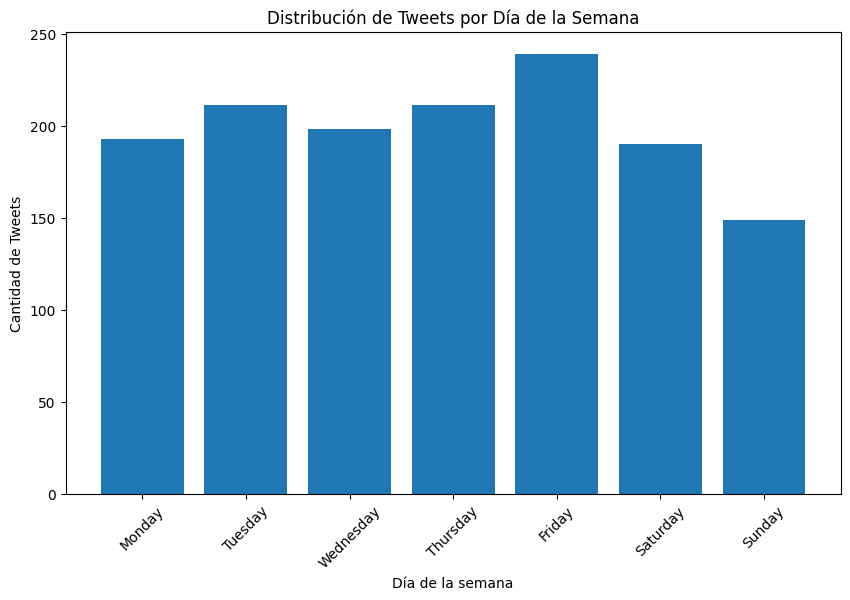

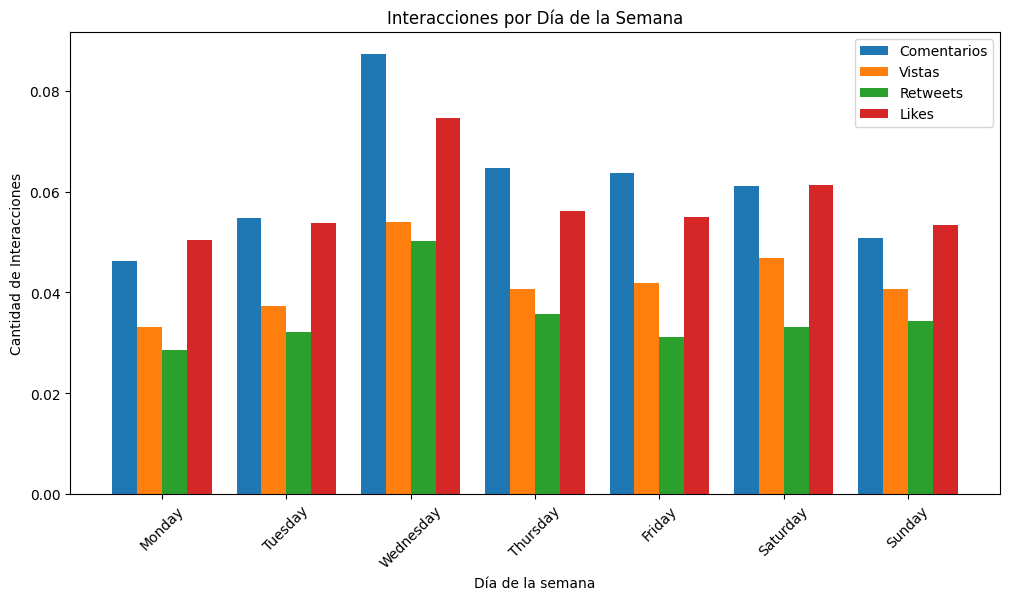

In [ ]:
# Graficamos Valores

# Crear un gráfico de barras para la cantidad de tweets por día
plt.figure(figsize=(10, 6))
plt.bar(df_Día.index, df_Día['Día'])
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Tweets')
plt.title('Distribución de Tweets por Día de la Semana')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


# Crear un gráfico de barras para las interacciones (comentarios, vistas, retweets, likes) por día
plt.figure(figsize=(12, 6))

# Definir las barras apiladas
width = 0.2
x = np.arange(len(df_Día.index))

plt.bar(x - 1.5*width, df_Día['Comentarios'], width, label='Comentarios')
plt.bar(x - 0.5*width, df_Día['Vistas'], width, label='Vistas')
plt.bar(x + 0.5*width, df_Día['Retweets'], width, label='Retweets')
plt.bar(x + 1.5*width, df_Día['Likes'], width, label='Likes')

plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Interacciones')
plt.title('Interacciones por Día de la Semana')
plt.xticks(x, df_Día.index, rotation=45)
plt.legend()
plt.show()

Observamos que el **viernes** es el día elegido para realizar **mayor cantidad de Posteos**. Sin embargo, es evidente que el **miércoles** representa mayor impacto y reacciones en los seguidores.
LA actividad de los seguidores desciende levemente los lunes y martes.
Intentaremos reflejar esa observación en el df principal (df_gobierno) expresando la variacion porcentual por día en retweets

In [ ]:
# Limpiamos del dataframe las columnas 'Fecha' y 'Día'
df_gobierno = df_gobierno.drop(['Fecha', 'Día'], axis=1)

df_gobierno.head()

,Nombre,Cuenta,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden
0,Manuel Adorni,@madorni,¡Feliz día de la Raza!\n\nFin.,0,0.093394,0.139914,0.039904,0.106780,13,6
1,Manuel Adorni,@madorni,Nace el “Palacio Libertad”. Fin.,1,0.226650,0.189919,0.071907,0.128174,18,5
2,Manuel Adorni,@madorni,El CCK ha dejado de existir.\n\nFin.,1,0.116275,0.259926,0.075908,0.112129,16,4
3,Manuel Adorni,@madorni,"En septiembre de 2024 la inflación fue del 3,5...",0,0.041593,0.053305,0.039904,0.074688,16,4
4,Manuel Adorni,@madorni,Estuviste en otra conferencia evidentemente. ¿...,0,0.019499,0.015502,0.018362,0.046340,13,4


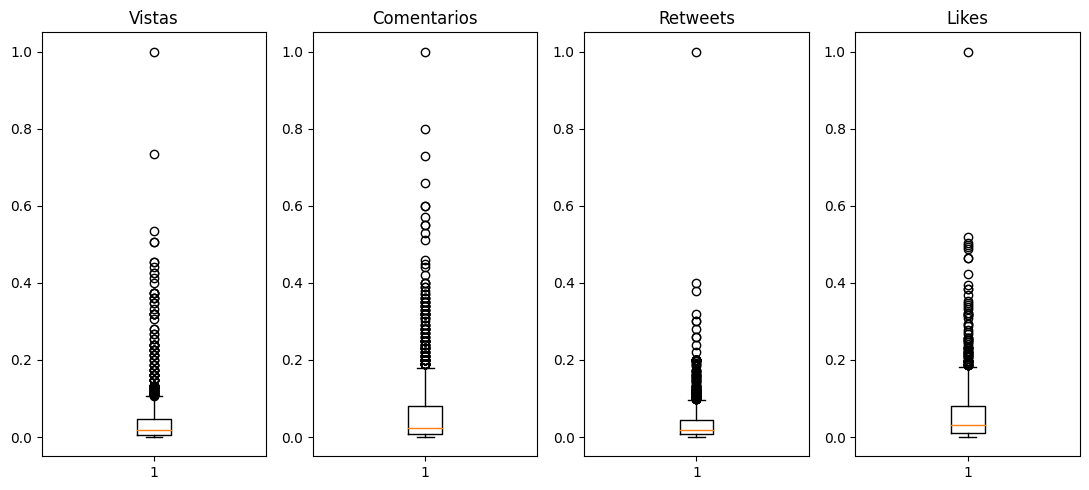

In [ ]:
# Creamos un grafico subplot con 4 boxplots
fig, axs = plt.subplots(1, 4, figsize=(11, 5))

# boxplot Vistas
axs[0].boxplot(df_gobierno['Vistas'])
axs[0].set_title('Vistas')

# boxplot Comentarios
axs[1].boxplot(df_gobierno['Comentarios'])
axs[1].set_title('Comentarios')

# boxplot Retweets
axs[2].boxplot(df_gobierno['Retweets'])
axs[2].set_title('Retweets')

# boxplot Likes
axs[3].boxplot(df_gobierno['Likes'])
axs[3].set_title('Likes')

plt.tight_layout()
plt.show()

Se observan valores atípicos en todos las varaibles

**Análisis valores atípicos**

In [ ]:
# Ordenamos el DataFrame por la columna 'Vistas' en orden descendente y obtener los 5 primeros registros
top_5_vistas = df_gobierno.sort_values('Vistas', ascending=False).head(10)

top_5_vistas.head(10)

,Nombre,Cuenta,Tweet,Multimedia,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden
1168,Victoria Villarruel,@VickyVillarruel,Argentina es un país soberano y libre. Nunca t...,1,1.000000,1.000000,1.000000,1.000000,18,3
1327,Victoria Villarruel,@VickyVillarruel,El amor vence al odio… mujeres agrediendo a ot...,1,0.733328,0.399940,0.199920,0.181661,21,7
1330,Victoria Villarruel,@VickyVillarruel,Los DDHH son para Todos. La Memoria también. V...,1,0.533324,0.289929,0.219922,0.138872,9,7
35,Manuel Adorni,@madorni,Antes de ingresar a la cena en la Quinta de Ol...,1,0.506656,0.419942,0.087909,0.160266,0,3
1226,Victoria Villarruel,@VickyVillarruel,La entrevista de Fabiola no significa nada par...,0,0.506656,0.599960,0.399940,0.491881,11,7
1312,Victoria Villarruel,@VickyVillarruel,Soy hija de la universidad pública. \nLa que e...,0,0.453322,0.509951,0.379938,0.352817,12,3
1172,Victoria Villarruel,@VickyVillarruel,"Con Isabel Martínez de Perón, primera presiden...",1,0.453322,0.599960,0.093909,0.112129,15,4
631,Javier Milei,@JMilei,INFLACIÓN BAJANDO\n1. Sin pasar antes por una ...,0,0.439988,0.349935,0.279928,0.486532,17,4
1272,Victoria Villarruel,@VickyVillarruel,Argentina es un pueblo libre que no se deja pr...,1,0.426655,0.349935,0.239924,0.293982,10,5
32,Manuel Adorni,@madorni,Nos encerraron meses. Cerraron escuelas y come...,0,0.426655,0.299930,0.119912,0.187009,21,3


Luegon de análizar los valores atípicos identificamos que aqulos valores más elevados responden a la herramienta **"Pinned"** que permite anclar un posteo, posicionándolo en una jeraquía superior al resto.  SE PROCEDERÁ A SU ELIMINACION.-

El resto de lo outliers no se eliminará

In [ ]:
 # Eliminamos el registro 1172
df_gobierno = df_gobierno.drop(1172)

In [ ]:
df_gobierno.shape

(1390, 10)

## **Gráfico de relaciones entre pares de variables**

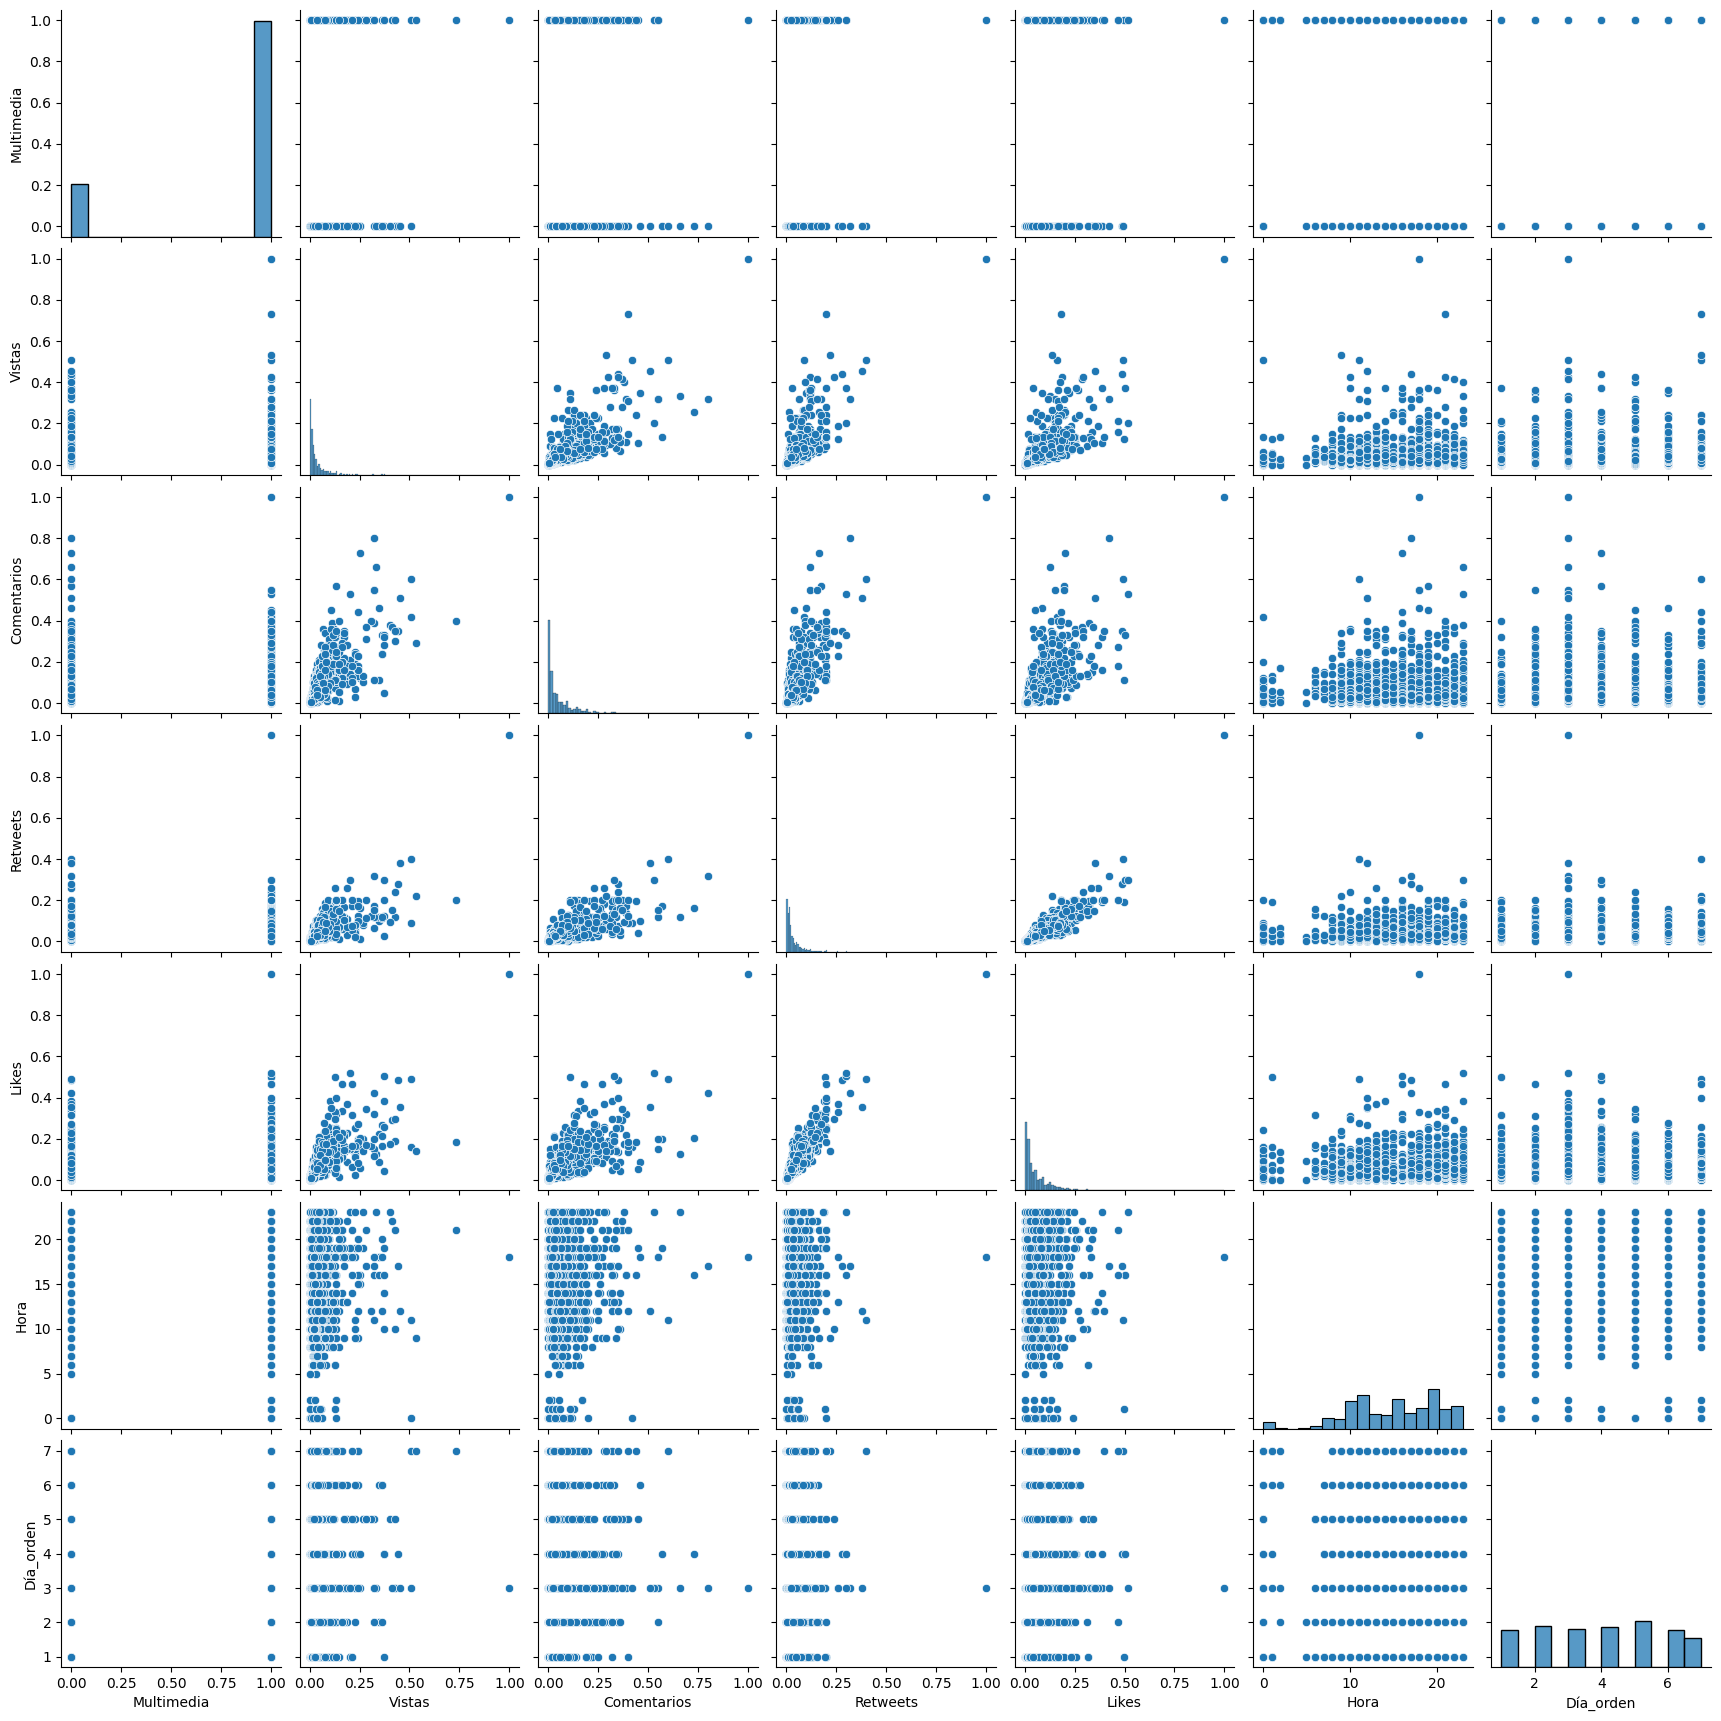

In [ ]:
sns.pairplot(df_gobierno)

Como era de esperarse se observa relación entre los atributos **Vistas, Comentarios, Retweets y Likes**. La relación más notoria se observa entre **Retweets y Likes**. El atributo "Multimedia" no refleja una relación directa con las otras variables por lo que se procederá a su eliminación.

In [ ]:
# Eliminamos la columna Multimedia

df_gobierno = df_gobierno.drop('Multimedia', axis=1)

df_gobierno.head()

,Nombre,Cuenta,Tweet,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden
0,Manuel Adorni,@madorni,¡Feliz día de la Raza!\n\nFin.,0.093394,0.139914,0.039904,0.106780,13,6
1,Manuel Adorni,@madorni,Nace el “Palacio Libertad”. Fin.,0.226650,0.189919,0.071907,0.128174,18,5
2,Manuel Adorni,@madorni,El CCK ha dejado de existir.\n\nFin.,0.116275,0.259926,0.075908,0.112129,16,4
3,Manuel Adorni,@madorni,"En septiembre de 2024 la inflación fue del 3,5...",0.041593,0.053305,0.039904,0.074688,16,4
4,Manuel Adorni,@madorni,Estuviste en otra conferencia evidentemente. ¿...,0.019499,0.015502,0.018362,0.046340,13,4


## **Análisis de "TWEET"**

### **Nube de Palabras**

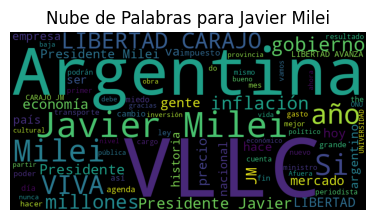

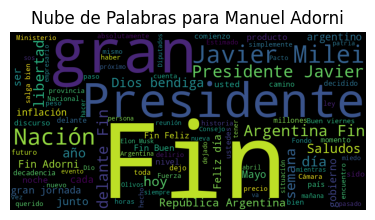

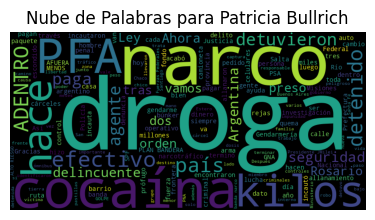

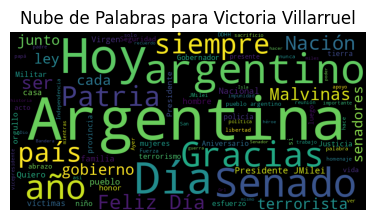

In [ ]:
# Agrupar los tweets por nombre
tweets_por_nombre = df_gobierno.groupby('Nombre')['Tweet'].apply(list)


def generar_nube_palabras(tweets):
    """Genera una nube de palabras a partir de una lista de tweets."""

    texto = ' '.join(tweets)
    stopwords_espanol = set(stopwords.words('spanish')) #Eliminamos palabras vacías
    wordcloud = WordCloud(width=800, height=400,
                          background_color='black',
                          stopwords=stopwords_espanol,
                          min_font_size=10).generate(texto)

    return wordcloud


# Iterar sobre cada nombre y generar una nube de palabras
for nombre, tweets in tweets_por_nombre.items():
    wordcloud = generar_nube_palabras(tweets)


    plt.figure(figsize=(4, 2), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Nube de Palabras para {nombre}")
    plt.tight_layout(pad=0)
    plt.show()


En una nube de palabras filtrada por "Nombre" se destaca  **VLLC (Viva la libertad Carajo)** dentro de los tweets de **JAvier MIlei**. **Manuel Adrorni**, como era de esperarse, siendo el vocero presidencial, hace referencias al **presidente** y utiliza la palabra "fin" como cierre de sus comentarios.  

Quien más destaca por el contenido de sus mensajes es **Patricia Bullrich** cuyos posteos muestran su trabajo en la lucha contra el crimen organizado, destacando palabra como **"droga", narco", "cocaína"**

**Victoria Villarruel** utiliza la red social "X" en un sentido más instirucional, no encontrando sentimientos marcados en sus palabras.  

**Análisis de Sentimiento**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Puntuaciones de sentimiento cercanas a 1: Indican sentimiento positivo. Puntuaciones cercanas a -1: Indican sentimiento negativo. Puntuaciones cercanas a 0: Indican sentimiento neutral.

df_gobierno['Sentimiento'] = df_gobierno['Tweet'].apply(get_sentiment)
df_gobierno.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Nombre,Cuenta,Tweet,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden,Sentimiento
0,Manuel Adorni,@madorni,¡Feliz día de la Raza!\n\nFin.,0.093394,0.139914,0.039904,0.106780,13,6,0.0000
1,Manuel Adorni,@madorni,Nace el “Palacio Libertad”. Fin.,0.226650,0.189919,0.071907,0.128174,18,5,0.0000
2,Manuel Adorni,@madorni,El CCK ha dejado de existir.\n\nFin.,0.116275,0.259926,0.075908,0.112129,16,4,0.3400
3,Manuel Adorni,@madorni,"En septiembre de 2024 la inflación fue del 3,5...",0.041593,0.053305,0.039904,0.074688,16,4,-0.2960
4,Manuel Adorni,@madorni,Estuviste en otra conferencia evidentemente. ¿...,0.019499,0.015502,0.018362,0.046340,13,4,-0.5267


Sentimiento
Neutral     939
Negativo    357
Positivo     94
Name: count, dtype: int64


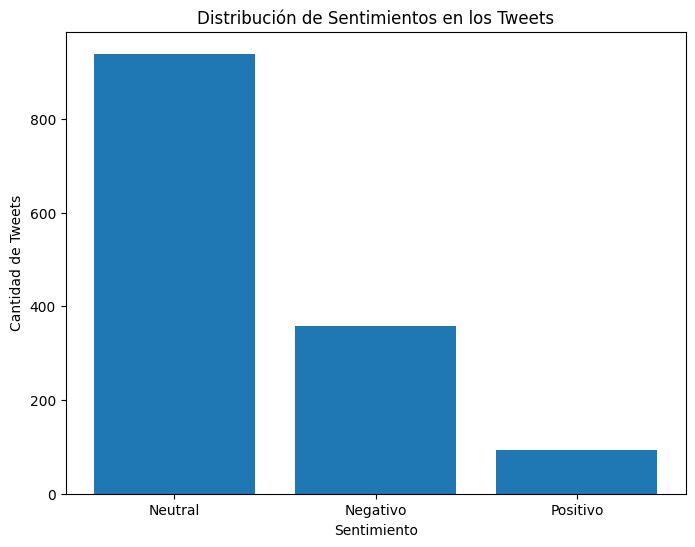

In [ ]:
# Agrupar y contar los sentimientos
sentimiento_counts = df_gobierno['Sentimiento'].apply(lambda score: 'Positivo' if score > 0 else ('Negativo' if score < 0 else 'Neutral')).value_counts()

print(sentimiento_counts)

# Crear un gráfico de barras para mostrar la distribución de sentimientos
plt.figure(figsize=(8, 6))
plt.bar(sentimiento_counts.index, sentimiento_counts.values)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.title('Distribución de Sentimientos en los Tweets')
plt.show()

Observamos que la mayoría de los Tweets los clasifica como Neutral lo que nos hace descartar este atributo al momento de predecir

### **Longitud del Tweet**

In [ ]:
# Añadir una nueva columna con la longitud de cada tweet
df_gobierno['Longitud'] = df_gobierno['Tweet'].apply(len)

# Descripción estadística de la longitud de los tweets
df_gobierno['Longitud'].describe()



,Longitud
count,1390.000000
mean,234.797122
std,210.863497
min,2.000000
25%,75.000000
50%,190.500000
75%,329.000000
max,2087.000000


In [ ]:
df_gobierno.head()

,Nombre,Cuenta,Tweet,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden,Sentimiento,Longitud
0,Manuel Adorni,@madorni,¡Feliz día de la Raza!\n\nFin.,0.093394,0.139914,0.039904,0.106780,13,6,0.0000,28
1,Manuel Adorni,@madorni,Nace el “Palacio Libertad”. Fin.,0.226650,0.189919,0.071907,0.128174,18,5,0.0000,32
2,Manuel Adorni,@madorni,El CCK ha dejado de existir.\n\nFin.,0.116275,0.259926,0.075908,0.112129,16,4,0.3400,34
3,Manuel Adorni,@madorni,"En septiembre de 2024 la inflación fue del 3,5...",0.041593,0.053305,0.039904,0.074688,16,4,-0.2960,364
4,Manuel Adorni,@madorni,Estuviste en otra conferencia evidentemente. ¿...,0.019499,0.015502,0.018362,0.046340,13,4,-0.5267,263


**Análisis de Variable objetivo**

Toda vez que los Retweet serían los atributos con mayor impacto nos centraremos en su estudio

In [ ]:
# Filtrar los 50 registros con más retweets
top_50_retweets = df_gobierno.sort_values('Retweets', ascending=False).head(50)
top_50_retweets.head()

,Nombre,Cuenta,Tweet,Vistas,Comentarios,Retweets,Likes,Hora,Día_orden,Sentimiento
1168,Victoria Villarruel,@VickyVillarruel,Argentina es un país soberano y libre. Nunca t...,1.000000,1.000000,1.000000,1.000000,18,3,-0.4724
1226,Victoria Villarruel,@VickyVillarruel,La entrevista de Fabiola no significa nada par...,0.506656,0.599960,0.399940,0.491881,11,7,-0.9081
1312,Victoria Villarruel,@VickyVillarruel,Soy hija de la universidad pública. \nLa que e...,0.453322,0.509951,0.379938,0.352817,12,3,-0.9618
809,Patricia Bullrich,@PatoBullrich,A los violentos antidemocráticos que golpearon...,0.319986,0.799980,0.319932,0.422349,17,3,-0.2960
1282,Victoria Villarruel,@VickyVillarruel,Aprobada la Ley Bases en lo general en la Hono...,0.199983,0.529953,0.299930,0.518624,23,3,0.5848


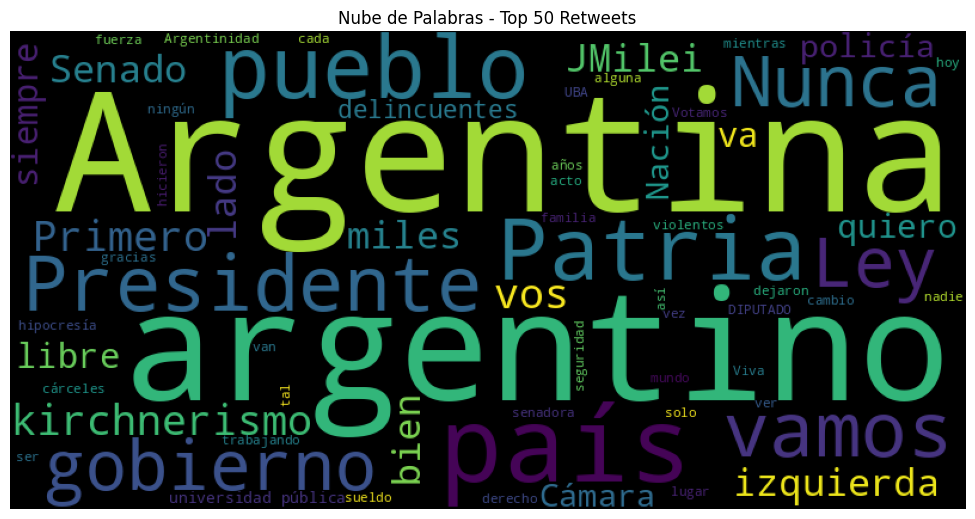

In [ ]:
def nube_top_50_retweets(tweets):
    """Genera una nube de palabras a partir de una lista de tweets."""

    texto = ' '.join(tweets)

    # Definir palabras vacías personalizadas
    custom_stopwords = ['fin','senadores','mismo','si']
    stopwords_espanol = stopwords.words('spanish')
    stopwords_espanol.extend(custom_stopwords)  # Lista extendida
    stopwords_espanol = set(stopwords_espanol) # convertir una lista a un conjunto

    wordcloud = WordCloud(width=800, height=400,
                          background_color='black',
                          stopwords=stopwords_espanol,
                          min_font_size=10).generate(texto)

    return wordcloud

  # Generar nube de palabras para los top 50 retweets
wordcloud_top_retweets = nube_top_50_retweets(top_50_retweets['Tweet'].tolist())

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud_top_retweets)
plt.axis("off")
plt.title("Nube de Palabras - Top 50 Retweets")
plt.tight_layout(pad=0)
plt.show()



Se observan palabras que denotan inclusión y puntos en común con el receptor **(Argentina, Argentino, Patria, País, pueblo)**, y algunas que marcan contrapunto con sus adversarios **(Kirchnerismo, Izquierda)**

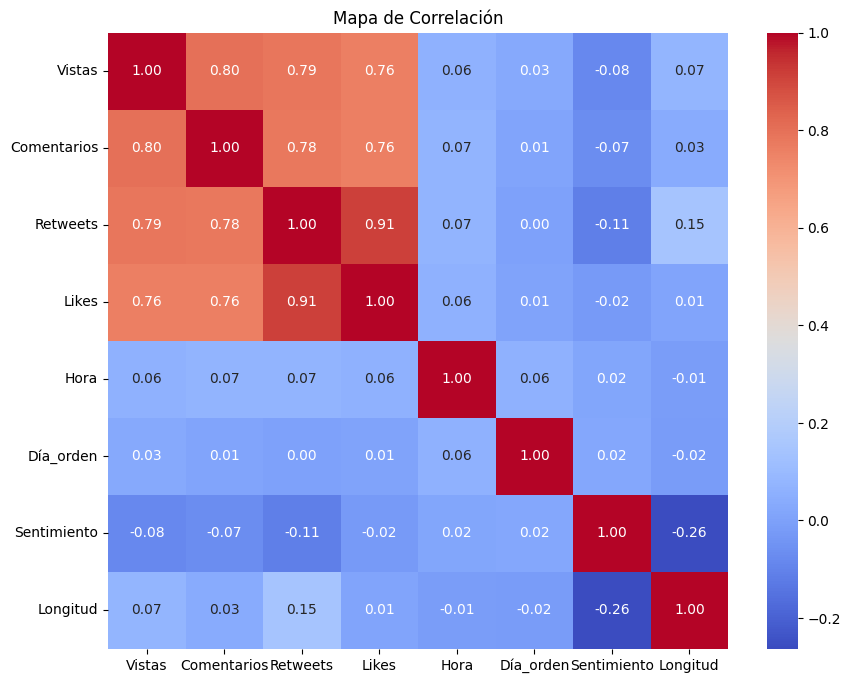

In [ ]:
# Mapa de correlación
correlation_matrix = df_gobierno[['Vistas', 'Comentarios', 'Retweets', 'Likes', 'Hora', 'Día_orden','Sentimiento','Longitud']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()

## **Modelado Machine Learning**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from scipy.sparse import hstack
#from nltk.corpus import stopwords
#import nltk

## **TfidfVectorizer**

TfidfVectorizer: Convierte una colección de documentos de texto sin procesar en una matriz de características numéricas TF-IDF (TF: Indica la importancia de una palabra dentro de un documento.IDF: Indica la rareza de una palabra en todo el conjunto de datos). Estas características representan la importancia de las palabras en los documentos.

In [ ]:
# Preprocesar el texto y usar stopwords en español
vectorizer = TfidfVectorizer(stop_words=stopwords.words('spanish'))
X_text = vectorizer.fit_transform(df_gobierno['Tweet'])
X = hstack([X_text, df_gobierno[['Vistas', 'Longitud']]])



# Definir las variables objetivo
y = df_gobierno['Retweets']


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



## **Random Forest**

In [ ]:
# Entrenar el modelo (ejemplo con RandomForestRegressor)

model = RandomForestRegressor(n_estimators=100,max_depth= 5, min_samples_split=8, random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)


In [ ]:
# Evaluar el modelo
print("MAE para Retweets: ", mean_absolute_error(y_test, y_pred))
print("MSE para Retweets: ", mean_squared_error(y_test, y_pred))
print("R2 para Retweets: ", r2_score(y_test, y_pred))

MAE para Retweets:  0.013968422669496015
MSE para Retweets:  0.0006728202094690061
R2 para Retweets:  0.6560385634741328


**Mejora de Hiperparámetros** GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos la cuadrícula de parámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
}

# Creamos un objeto GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Use negative MSE for maximization
                           cv=5,  # Use 5-fold cross-validation
                           verbose=2)

# Ajustamos el objeto GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimimos los mejores parámetros y la puntuación
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Obtenemos el mejor modelo de GridSearchCV
best_model = grid_search.best_estimator_

# Evaluamos el mejor modelo en el conjunto de test
y_pred = best_model.predict(X_test)
print("MAE para Retweets (best model): ", mean_absolute_error(y_test, y_pred))
print("MSE para Retweets (best model): ", mean_squared_error(y_test, y_pred))
print("R2 para Retweets (best model): ", r2_score(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   7.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   8.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   7.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  17.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  17.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  16.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  17.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  23.4s
[CV] END max_depth=None, min_s

## **XGBOOST**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# Entrenar el modelo XGBoost
model_xgb = XGBRegressor(n_estimators=150, learning_rate=0.09, random_state=42)
model_xgb.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar el modelo
print("MAE para Retweets (XGBoost): ", mean_absolute_error(y_test, y_pred_xgb))
print("MSE para Retweets (XGBoost): ", mean_squared_error(y_test, y_pred_xgb))
print("R2 para Retweets (XGBoost): ", r2_score(y_test, y_pred_xgb))

MAE para Retweets (XGBoost):  0.01351403709656763
MSE para Retweets (XGBoost):  0.0006830743241486745
R2 para Retweets (XGBoost):  0.6507964200814675


**Mejora de Hiperparámetros** RandomizedSearchCV


In [ ]:
# Definimos parámetros
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


from sklearn.model_selection import RandomizedSearchCV

# Creamos un objeto random search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Ajusta el objeto de búsqueda aleatoria a los datos
random_search.fit(X_train, y_train)

# Imprime los mejores parámetros y la mejor puntuación
print("Best parameters:", random_search.best_params_)
print("Best score (negative MSE):", random_search.best_score_)

# Obtenemos el mejor modelo de random search
best_random_model = random_search.best_estimator_

# Evaluamos el mejor modelo en el conjunto de test
y_pred_random = best_random_model.predict(X_test)
print("MAE para Retweets (best random model): ", mean_absolute_error(y_test, y_pred_random))
print("MSE para Retweets (best random model): ", mean_squared_error(y_test, y_pred_random))
print("R2 para Retweets (best random model): ", r2_score(y_test, y_pred_random))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Best score (negative MSE): 0.5816190631705531
MAE para Retweets (best random model):  0.013808899256644448
MSE para Retweets (best random model):  0.0007029414442347715
R2 para Retweets (best random model):  0.6406398833599578


Ambos Modelos predicen de manera similar

## **Conclusión**
En este proyecto, se ha abordado el desafío de predecir la cantidad de retweets de Posteos gubernamentales utilizando técnicas de Machine Learning. Se exploraron diferentes métodos de vectorización de texto, como TF-IDF, y se consideraron variables adicionales como la longitud del tweet, el día de la semana y la hora de publicación para mejorar la precisión del modelo.

Se experimentó con algoritmos como Random Forest y XGBoost, ajustando sus hiperparámetros para optimizar su rendimiento. A través de la búsqueda de cuadrícula y la validación cruzada, se identificaron las mejores configuraciones para cada modelo, buscando minimizar el error de predicción.

Se observó que la inclusión de variables adicionales como la actividad del día de la semana y la longitud del tweet mejoró la capacidad predictiva del modelo.

Aunque se lograron resultados prometedores, es importante destacar que la predicción de retweets en redes sociales es un problema complejo con múltiples factores influyentes.

En conclusión, este proyecto demuestra el potencial del aprendizaje automático para predecir la viralidad de contenido en redes sociales. La combinación de técnicas de procesamiento de lenguaje natural, la selección de variables relevantes y el ajuste de hiperparámetros permite construir modelos capaces de predecir con cierta precisión la cantidad de retweets de un tweet. Este conocimiento puede ser de gran utilidad para entidades gubernamentales que buscan optimizar su comunicación en redes sociales y aumentar el alcance de sus mensajes.



## **Recomendaciones e Insights**
**Frecuencia y Relevancia de Posteos:**


**Optimizar la estrategia para los miércoles:** Se ha observado que los miércoles presentan mayor actividad de los usuarios. Para aprovechar este pico de interacción, se recomienda:

**Priorizar la publicación de contenido relevante y de alta calidad en este día.**

**Espaciar el tiempo entre los posteos** para evitar saturar a la audiencia y maximizar la visibilidad de cada publicación.

**Utilizar la herramienta "Pinned" estratégicamente:** Esta herramienta ayuda a destacar un posteo específico, manteniéndolo en la parte superior del perfil. Se recomienda utilizarla para contenido de gran importancia o que se desee promocionar de manera especial.

**Impulsar la Interacción:**

**Priorizar contenido con alto potencial de Vistas:** Las vistas son un factor clave para generar interacción en las publicaciones (comentarios, retweets, likes). Se recomienda enfocarse en crear contenido atractivo y de interés para la audiencia, utilizando formatos como videos, imágenes, infografías, etc.

**Generar emociones y reacciones:** El uso de palabras que generen emociones en el lector puede aumentar la interacción.

**Palabras que generen pertenencia:** Incluir palabras como "país", "pueblo", "argentinos", etc. puede crear un sentido de comunidad y aumentar la identificación con el contenido.

**Palabras que generen contrapunto:** Utilizar palabras que marquen un contraste, como "delincuentes", "narco", etc., puede generar debate y reacciones en la audiencia. Sin embargo, es importante utilizar este tipo de lenguaje con responsabilidad y evitar la polarización.